In [27]:
import pandas as pd

In [28]:
import os
os.getcwd()

'/Users/adebimpeolorundare'

# Import Libraries

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier# import library function for random forest classification algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split #library function to split the dataset into train and test data
from sklearn.metrics import accuracy_score # accuracy of the model classification
from sklearn.metrics import roc_auc_score

# Data Collection

In [30]:
df = pd.read_csv("/Users/adebimpeolorundare/Desktop/BA_Forage/data/customer_booking.csv", encoding="ISO-8859-1")


In [31]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [33]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [34]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

In [35]:
df["flight_day"] = df["flight_day"].map(mapping)

In [36]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [37]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [38]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [39]:
df.shape

(50000, 14)

In [40]:
df =df.dropna() #checking for duplicate

In [41]:
df.shape

(50000, 14)

In [42]:
# check missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [43]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [274]:
from sklearn.feature_selection import mutual_info_classif

# Load the Iris dataset
df = pd.read_csv("/Users/adebimpeolorundare/Desktop/BA_Forage/data/customer_booking.csv", encoding="ISO-8859-1")

In [279]:
X_mi, y_mi = df[['num_passengers','sales_channel','trip_type','purchase_lead','length_of_stay','flight_hour', 'flight_day', 'route', 'booking_origin','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration']], df[['booking_complete']]
#changing object dtype to int dtype
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [280]:
# Calculate mutual information for classification data
mutual_info_cls = mutual_info_classif(X_mi, y_mi)

print("Mutual Information for Classification:")
for i in range(len(mutual_info_cls)):
    print(f"Feature {i+1}: {mutual_info_cls[i]}")


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Mutual Information for Classification:
Feature 1: 0.002373166793042003
Feature 2: 0.0021143142705746243
Feature 3: 0.0
Feature 4: 0.0034691737292655844
Feature 5: 0.009388751935368145
Feature 6: 0.003970617936542187
Feature 7: 0.0009021686381169847
Feature 8: 0.05382239497309671
Feature 9: 0.04919915028754529
Feature 10: 0.008955045221469282
Feature 11: 0.004494179349300964
Feature 12: 0.005339122236702076
Feature 13: 0.014490182084592407


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'route'),
  Text(1, 0, 'booking_origin'),
  Text(2, 0, 'flight_duration'),
  Text(3, 0, 'length_of_stay'),
  Text(4, 0, 'wants_extra_baggage'),
  Text(5, 0, 'wants_in_flight_meals'),
  Text(6, 0, 'wants_preferred_seat'),
  Text(7, 0, 'flight_hour'),
  Text(8, 0, 'purchase_lead'),
  Text(9, 0, 'num_passengers'),
  Text(10, 0, 'sales_channel'),
  Text(11, 0, 'flight_day'),
  Text(12, 0, 'trip_type')])

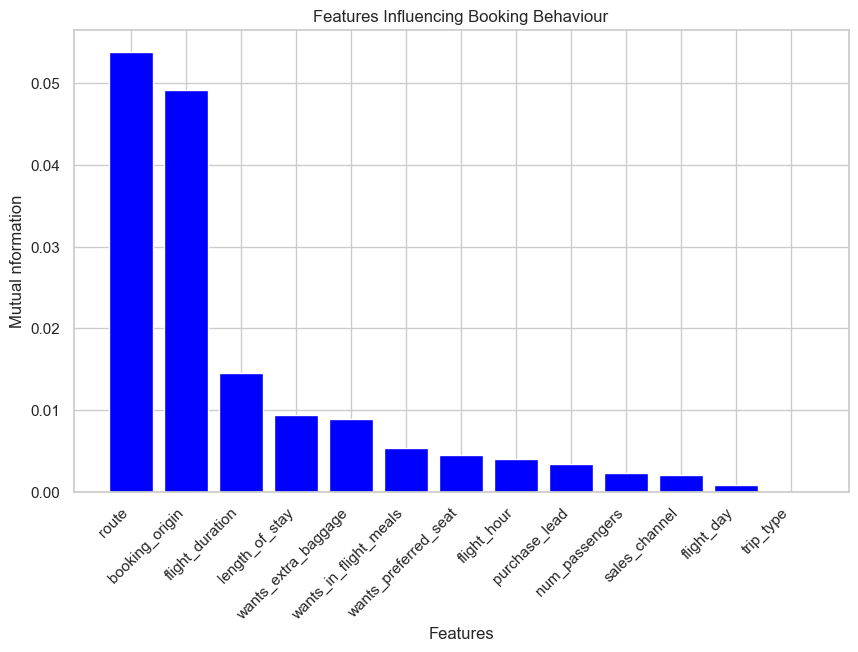

In [287]:
#Create a DataFrame for easier plotting
mi_df = pd.DataFrame({'Feature': X_mi.columns, 'Mutual Information': mutual_info_cls})

# Sort the DataFrame by Mutual Information values for better visualization
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(mi_df['Feature'], mi_df['Mutual Information'], color='blue')
plt.xlabel('Features')
plt.ylabel('Mutual nformation')
plt.title('Features Influencing Booking Behaviour')
plt.xticks(rotation=45, ha='right')

In [272]:
#Remove columns not needed from the dataset
df = df.drop(columns=[ 'sales_channel','route',])

In [56]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Flag
0,2,RoundTrip,262,19,7,6,1,0,0,5.52,0,0
1,1,RoundTrip,112,20,3,6,0,0,0,5.52,0,0
2,2,RoundTrip,243,22,17,3,1,1,0,5.52,0,0
3,1,RoundTrip,96,31,4,6,0,0,1,5.52,0,0
4,2,RoundTrip,68,22,15,3,1,0,1,5.52,0,0


In [46]:
#Max and Min Purchase_Lead
max_value = df['purchase_lead'].max()
min_value = df['purchase_lead'].min()

# Display the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 867
Minimum value: 0


In [47]:
#Max and Min length_of_stay
max_value = df['length_of_stay'].max()
min_value = df['length_of_stay'].min()

# Display the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 778
Minimum value: 0


In [48]:
#Max and Min flight_hour
max_value = df['flight_hour'].max()
min_value = df['flight_hour'].min()

# Display the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 23
Minimum value: 0


In [49]:
#Max and Min flight_duration
max_value = df['flight_duration'].max()
min_value = df['flight_duration'].min()

# Display the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 9.5
Minimum value: 4.67


In [51]:
#Remove columns not needed from the dataset
df = df.drop(columns=[ 'booking_origin'])

# Encoding Categorical Variable to Numerical Variable

In [57]:
df['trip_type']

0        RoundTrip
1        RoundTrip
2        RoundTrip
3        RoundTrip
4        RoundTrip
           ...    
49995    RoundTrip
49996    RoundTrip
49997    RoundTrip
49998    RoundTrip
49999    RoundTrip
Name: trip_type, Length: 50000, dtype: object

# Label Encoding

In [58]:
#label encoding for trip type
df['trip_type'].replace(['OneWay','RoundTrip', 'CircleTrip'],[1, 2, 3], inplace=True)
df['trip_type'].value_counts()

trip_type
2    49497
1      387
3      116
Name: count, dtype: int64

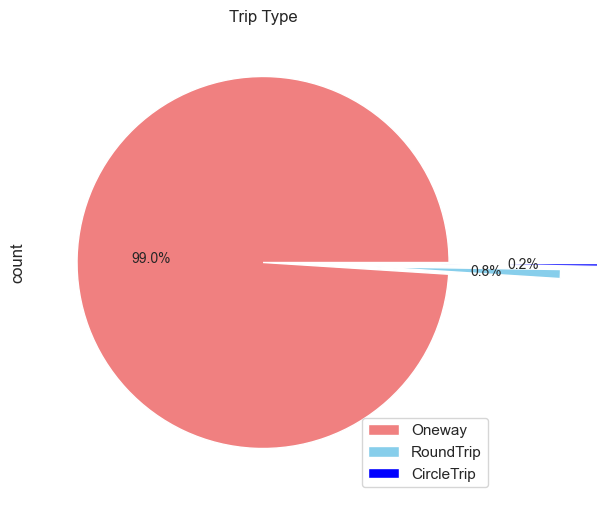

In [241]:
#percentage of the trip type
labels = ['Oneway','RoundTrip','CircleTrip']
sizes = [10, 40, 40]
explode = (0,0.6,0.8)
df['trip_type'].value_counts().plot.pie(autopct='%.1f%%',figsize=(6, 8), labels=None, colors=['lightcoral','skyblue','blue'], fontsize=10,explode=explode)
plt.title('Trip Type')
plt.legend(labels, loc='lower right')

In [255]:
#check if the target variable is imbalance
target = df['booking_complete']

In [256]:
target.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

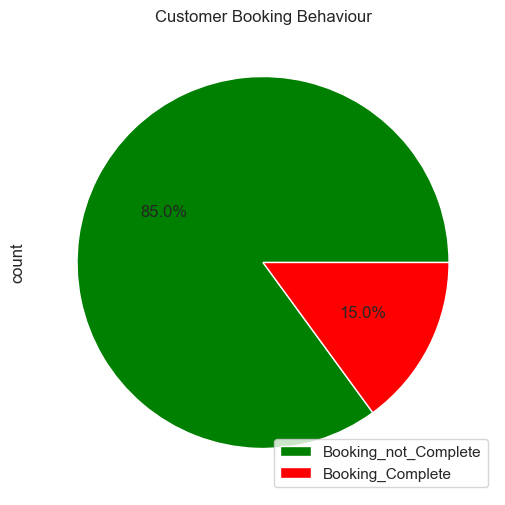

In [260]:
#percentage of the target variable: booking complete
labels=['Booking_not_Complete', 'Booking_Complete']
target.value_counts().plot.pie(autopct='%.1f%%',figsize=(6, 8), labels=None, colors=['green','red'] )
plt.title('Customer Booking Behaviour')
plt.legend(labels, loc='lower right')


# Correlation between the Data and Label

<AxesSubplot: >

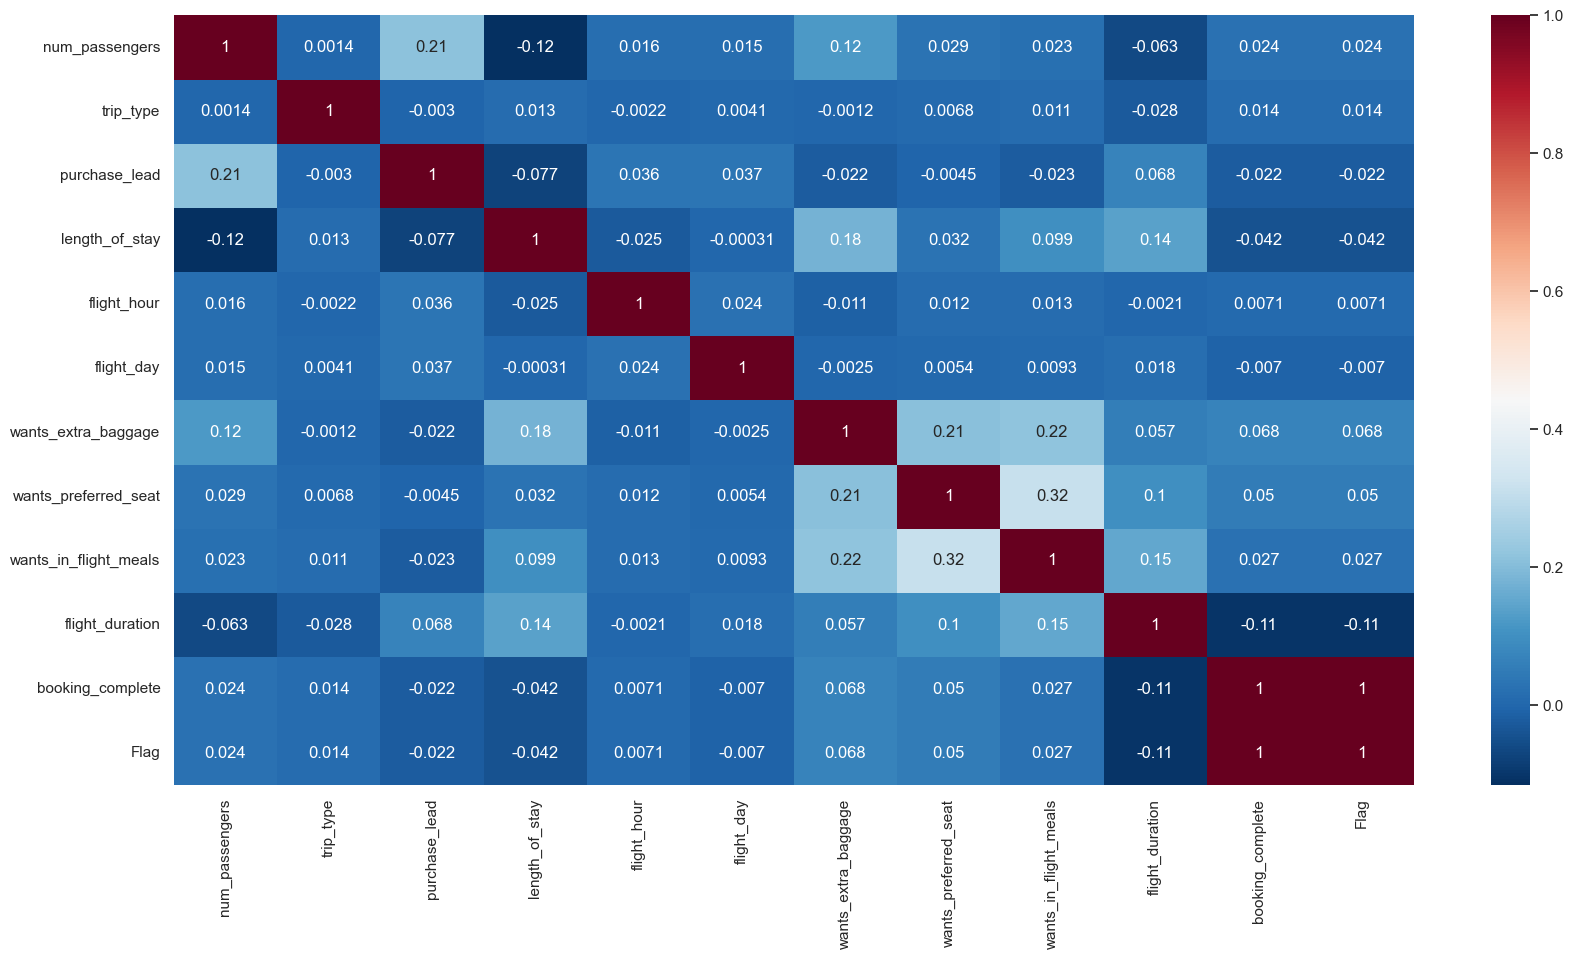

In [63]:
df["Flag"]=df['booking_complete']
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')


In [64]:
#absolute value of the correlations
df.corr().abs()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Flag
num_passengers,1.000000,0.001414,0.212606,0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,0.063169,0.024116,0.024116
trip_type,0.001414,1.000000,0.002994,0.012912,0.002214,0.004079,0.001171,0.006764,0.011205,0.028043,0.014296,0.014296
purchase_lead,0.212606,0.002994,1.000000,0.076560,0.035973,0.036531,0.022207,0.004499,0.022653,0.067866,0.022131,0.022131
length_of_stay,0.115850,0.012912,0.076560,1.000000,0.024872,0.000310,0.176757,0.032264,0.098828,0.141181,0.042408,0.042408
flight_hour,0.015607,0.002214,0.035973,0.024872,1.000000,0.024086,0.011434,0.012171,0.013014,0.002101,0.007127,0.007127
flight_day,0.015407,0.004079,0.036531,0.000310,0.024086,1.000000,0.002503,0.005392,0.009281,0.018434,0.006986,0.006986
wants_extra_baggage,0.120404,0.001171,0.022207,0.176757,0.011434,0.002503,1.000000,0.207669,0.216470,0.057054,0.068139,0.068139
wants_preferred_seat,0.028544,0.006764,0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116,0.050116
wants_in_flight_meals,0.022943,0.011205,0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511,0.026511
flight_duration,0.063169,0.028043,0.067866,0.141181,0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,0.106266,0.106266


In [65]:
#Sort the correlations in descending order
df.corr().sort_values(by='booking_complete', ascending=False)

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Flag
booking_complete,0.024116,0.014296,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000,1.000000
Flag,0.024116,0.014296,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000,1.000000
wants_extra_baggage,0.120404,-0.001171,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139,0.068139
wants_preferred_seat,0.028544,0.006764,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116,0.050116
wants_in_flight_meals,0.022943,0.011205,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511,0.026511
num_passengers,1.000000,0.001414,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116,0.024116
trip_type,0.001414,1.000000,-0.002994,0.012912,-0.002214,0.004079,-0.001171,0.006764,0.011205,-0.028043,0.014296,0.014296
flight_hour,0.015607,-0.002214,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127,0.007127
flight_day,0.015407,0.004079,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986,-0.006986
purchase_lead,0.212606,-0.002994,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131,-0.022131


In [66]:
#top 6 variables correlated with the target
top_6 = df.corr().head(7)

index_labels = top_6.index.tolist()

In [67]:
#Print the top 5 variables
print("Top 5 correlated numericalvariables:")
for label in index_labels[1:]:
    print(label)


Top 5 correlated numericalvariables:
trip_type
purchase_lead
length_of_stay
flight_hour
flight_day
wants_extra_baggage


In [68]:
#Remove columns not needed from the dataset
#df = df.drop(columns=[ 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'])

In [69]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Flag
0,2,2,262,19,7,6,1,0,0,5.52,0,0
1,1,2,112,20,3,6,0,0,0,5.52,0,0
2,2,2,243,22,17,3,1,1,0,5.52,0,0
3,1,2,96,31,4,6,0,0,1,5.52,0,0
4,2,2,68,22,15,3,1,0,1,5.52,0,0


# Feature Engineering

In [ ]:
#passengers with complete booking per flight day
#total_passenger_booking_complete_per_flight_day=target.value_counts()/ np.unique(df['flight_day'])

# Split Data to Test and Train 

In [173]:
#X = df.drop('num_passengers','wants_extra_baggage','Flag', axis=1)  # Features
#y = df['target']  # booking_complete is the Target variable 

#Split data into 20% and 80% for training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(df[['trip_type','purchase_lead','length_of_stay','flight_hour','flight_day','flight_duration']], df['booking_complete'] ,test_size=0.2, random_state=42) #test data is 20% and 80% for training data


# Random Forest Model

In [81]:
RF_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")
print('AUC score: ',roc_auc_score(y_test,y_pred))
     

Accuracy Score : 83.93 %
AUC score:  0.5224162542824514


In [82]:
print("Classification report - n",classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.86      0.97      0.91      8520
           1       0.31      0.07      0.12      1480

    accuracy                           0.84     10000
   macro avg       0.59      0.52      0.51     10000
weighted avg       0.78      0.84      0.79     10000



# XGBoost Model

In [105]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(max_depth=3,learning_rate=0.03,n_estimators=100)

XGB_model.fit(X_train,y_train)

y_pred_XGB_model=XGB_model.predict(X_test)


print("Accuracy Score :", accuracy_score(y_test,y_pred_XGB_model)*100, "%")
print('AUC score: ',roc_auc_score(y_test,y_pred_XGB_model))
#print("Classification report - n",classification_report(y_test, y_pred_XGB_model)

Accuracy Score : 85.2 %
AUC score:  0.5
Classification report - n               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# Feature Importance

In [91]:
#import shap

In [166]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(RF_model)

# Calculate SHAP values for a subset of the data (e.g., the first 100 instances)
shap_values = explainer.shap_values(X_test.iloc[:100])

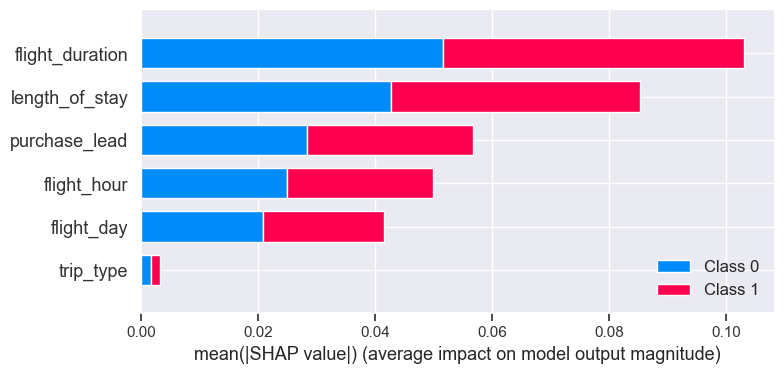

In [167]:
# Summary plot
#shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X.columns)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [164]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(XGB_model)

# Calculate SHAP values for a subset of the data (e.g., the first 100 instances)
shap_values = explainer.shap_values(X_test.iloc[:100])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


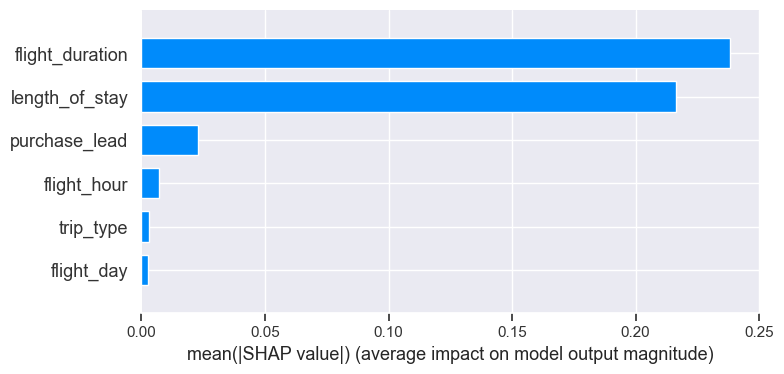

In [162]:
# Summary shap plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


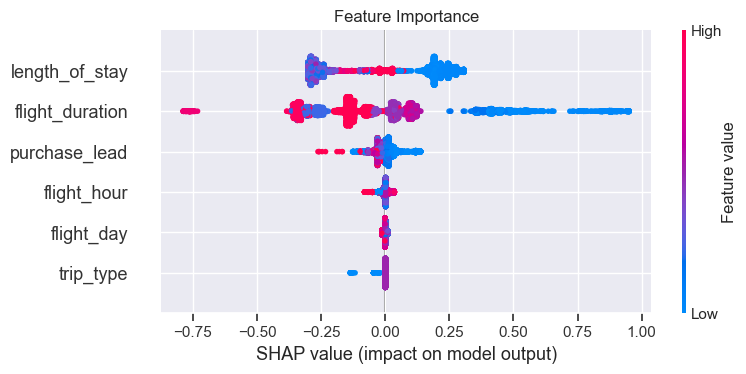

In [146]:
# Create plot title
plt.title("Feature Importance")
# Summary plot
shap.summary_plot(shap_values, X_test)


In [153]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(XGB_model)
shap_values = explainer.shap_values(X_test.iloc[:100])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [197]:
#visualize the first prediction's explanation
explainer = shap.Explainer(XGB_model)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


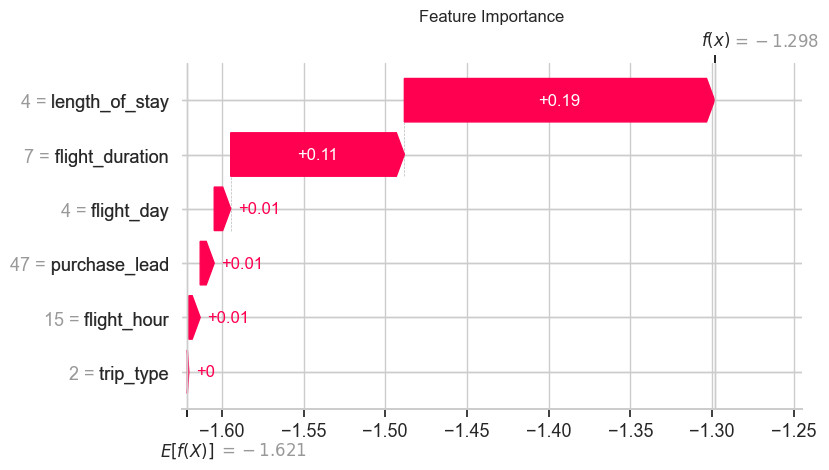

In [198]:
plt.title("Feature Importance")
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

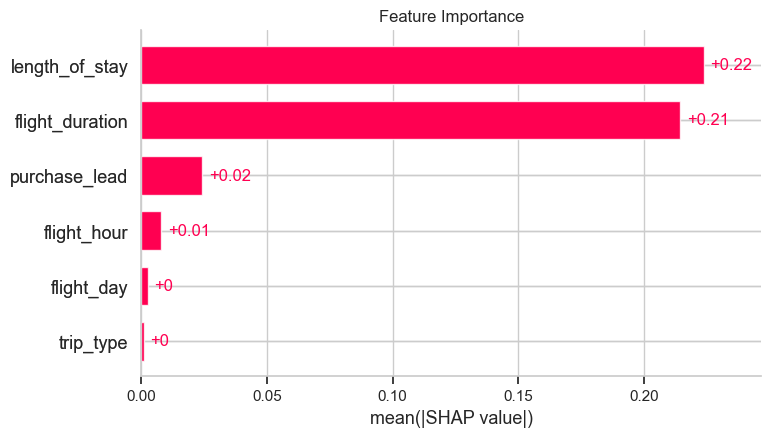

In [199]:
plt.title("Feature Importance")
shap.plots.bar(shap_values)

# 5-Fold Cross Validation

In [168]:
from sklearn.model_selection import cross_val_score, KFold

In [191]:
# Load dataset
X=X_test
y= y_test

In [207]:
# for regression cross validation(not needed)

#  KFold cross-validation
#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5-fold cross-validation
#cross_val_scores = cross_val_score(XGB_model, X, y, cv=kf, scoring='neg_mean_squared_error')


# mean squared error (MSE)
#mse_scores = -cross_val_scores

#MSE scores for each fold
#for i, mse in enumerate(mse_scores):
    #print(f'Fold {i+1}: MSE = {mse}')

#average MSE across all folds
#print(f'Average MSE: {np.mean(mse_scores)}')


In [208]:
# KFold cross-validation
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#5-fold cross-validation
#cross_val_scores = cross_val_score(XGB_model, X, y, cv=kf, scoring='neg_mean_squared_error')


In [209]:
#cross_val_scores

In [210]:
#Create a bar plot to visualize the mean squared error for each fold
#sns.set(style="whitegrid")
#plt.figure(figsize=(8, 6))
#sns.barplot(x=np.arange(1, 6), y=mse_scores, palette="viridis")
#plt.title('Cross Validation Results')
#plt.xlabel('Fold')
#plt.ylabel('Mean Squared Error (MSE)')
#plt.show()

In [204]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

#Stratified K-Fold cross-validation for classification model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [205]:
#5-fold cross-validation
cross_val_results = cross_val_score(XGB_model, X, y, cv=skf, scoring='accuracy')

In [206]:
# Print the accuracy for each fold
for i, accuracy in enumerate(cross_val_results):
    print(f'Fold {i+1}: Accuracy = {accuracy}')

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(cross_val_results)}')

Fold 1: Accuracy = 0.852
Fold 2: Accuracy = 0.852
Fold 3: Accuracy = 0.852
Fold 4: Accuracy = 0.852
Fold 5: Accuracy = 0.852
Average Accuracy: 0.852


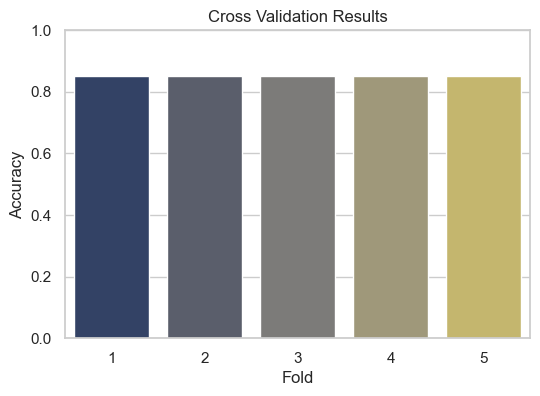

Average Accuracy: 0.852


In [226]:
#bar plot to visualize the accuracy for each fold
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=np.arange(1, 6), y=cross_val_results,palette="cividis")
plt.title('Cross Validation Results')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limit to match the accuracy range (0 to 1)
plt.show()

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(cross_val_results)}')
